In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [69]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [70]:
engine = create_engine("sqlite:///hawaii.sqlite")

In [71]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [72]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [73]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [74]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [75]:
final_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
final_date

('2017-08-23')

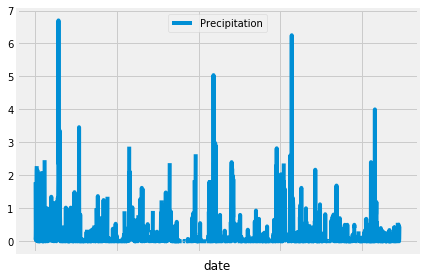

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
final_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
final_date

date = dt.datetime(2016,8,22)

# Perform a query to retrieve the data and precipitation scores
precip = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > date).all()
precip

# Save the query results as a Pandas DataFrame and set the index to the date column
data = pd.DataFrame(precip)
precip_df = data.set_index('date')
precip_df
# Sort the dataframe by date
sorted_precip = precip_df.sort_values('date')
sorted_precip

# Use Pandas Plotting with Matplotlib to plot the data

sorted_precip.plot()
plt.tight_layout()
plt.legend(['Precipitation'],loc='upper center')

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [13]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sorted_precip.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [14]:
# Design a query to show how many stations are available in this dataset?
countof_unique_stations = session.query(Measurement.station).distinct().count()
countof_unique_stations

named_unique_stations = session.query(Measurement.station).distinct().all()
named_unique_stations

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [15]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
grouped_unique_stations = session.query(Measurement.station,func.count(Measurement.prcp)).group_by(Measurement.station).\
order_by(func.count(Measurement.prcp).desc()).all()
grouped_unique_stations

[('USC00519281', 2772),
 ('USC00513117', 2696),
 ('USC00519397', 2685),
 ('USC00519523', 2572),
 ('USC00516128', 2484),
 ('USC00514830', 1937),
 ('USC00511918', 1932),
 ('USC00517948', 683),
 ('USC00518838', 342)]

In [16]:
most_active_station = session.query(Measurement.station).group_by(Measurement.station).\
order_by(func.count(Measurement.prcp).desc()).first()
most_active_station

('USC00519281')

In [17]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
active_station_stats = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs))\
.filter(Measurement.station == 'USC00519281').all()
active_station_stats

[(54.0, 85.0, 71.66378066378067)]

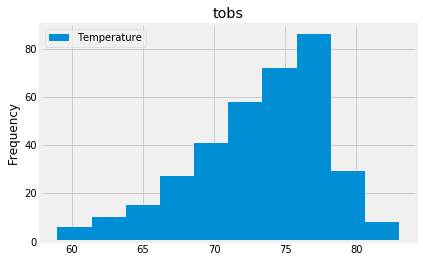

In [18]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_12_months = session.query(Measurement.tobs)\
.filter(Measurement.station == 'USC00519281').filter(Measurement.date > date).all()
active_station_12_months

active_station_df = pd.DataFrame(active_station_12_months)
active_station_df.hist()
plt.ylabel('Frequency')
plt.legend(['Temperature'],loc='upper left')
# active_station_df.plot()

![precipitation](Images/station-histogram.png)

In [27]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
yearly_averages = (calc_temps('2016-08-22', '2018-08-23'))
print(yearly_averages)



(58.0, 74.59901654000895, 87.0)


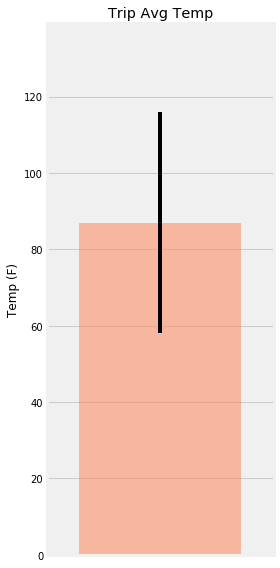

In [46]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots(figsize=plt.figaspect(2.))

x_axis=1
yerr = 87-58

bar = ax.bar(x_axis, 87, yerr=yerr, alpha=0.5,color='coral',align='center')

ax.set(xticks=range(x_axis),xticklabels='a',title="Trip Avg Temp", ylabel="Temp (F)")

ax.margins(.2,.2)

fig.tight_layout()

fig.show()

In [68]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
grouped_unique_stations = session.query(Measurement.station,func.count(Measurement.prcp)).group_by(Measurement.station).\
order_by(func.count(Measurement.prcp).desc()).all()

precip_df_final = pd.DataFrame(grouped_unique_stations, columns=['Station', 'Precip'])
precip_df_final

station_data = session.query(Station.station,Station.name,Station.latitude,Station.longitude,Station.elevation).all()
station_data_df = pd.DataFrame(station_data, columns=['Station','Name','Latitude','Longitude','Elevation'])
station_data_df

ultimate_df = pd.merge(precip_df_final,station_data_df,on='Station',how='outer')
ultimate_df.sort_values('Precip',ascending=False)

,Station,Precip,Name,Latitude,Longitude,Elevation
0,USC00519281,2772,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
1,USC00513117,2696,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
2,USC00519397,2685,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
3,USC00519523,2572,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
4,USC00516128,2484,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
5,USC00514830,1937,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
6,USC00511918,1932,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
7,USC00517948,683,"PEARL CITY, HI US",21.39340,-157.97510,11.9
8,USC00518838,342,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
